In [1]:
import sys
sys.path.append('/Users/aidanmorrison/bayesnets')

In [158]:
from swarm import core
from swarm import io
import json
import basic_hive
import importlib
from matplotlib import pyplot as plt
import utils
import numpy as np
import pandas as pd
import itertools

In [165]:
alist = [['a', 'b'], [1,2,3]]

In [168]:
list(itertools.product(*alist))

[('a', 1), ('a', 2), ('a', 3), ('b', 1), ('b', 2), ('b', 3)]

In [170]:
hidden_list = [1]
width_list = [10]
momentum_list = [0.7, 0.9, 0.96]
lr_list = [0.002, 0.01, 0.03]
variations_list = [hidden_list, width_list, momentum_list, lr_list]
param_list = itertools.product(*variations_list)

In [171]:
list(param_list)

[(1, 10, 0.7, 0.002),
 (1, 10, 0.7, 0.01),
 (1, 10, 0.7, 0.03),
 (1, 10, 0.9, 0.002),
 (1, 10, 0.9, 0.01),
 (1, 10, 0.9, 0.03),
 (1, 10, 0.96, 0.002),
 (1, 10, 0.96, 0.01),
 (1, 10, 0.96, 0.03)]

In [255]:
importlib.reload(basic_hive)
importlib.reload(utils)

<module 'utils' from '/Users/aidanmorrison/bayesnets/experiments/goofy/utils.py'>

In [175]:
reslist, static_params = basic_hive.main()

In [176]:
data,loss, xy, params = utils.unpacker(reslist, static_params)

In [177]:
data_df, loss_df, param_df = utils.make_frames(data, loss, static_params, params)

In [178]:
long_data = pd.melt(data_df,id_vars = ['swarm', 'bee', 'epoch'], var_name = 'x', value_name = 'ypred')

In [179]:
df = long_data.merge(param_df, how = 'left', left_on = 'swarm', right_on = 'swarm')

In [182]:
df = df.merge(loss_df, how = 'left', left_on = ['swarm', 'bee', 'epoch'], right_on = ['swarm', 'bee', 'epoch'])

In [256]:
df = basic_hive.get_long_results()

In [257]:
df

,swarm,bee,epoch,x,ypred,hidden,width,num_epochs,activation,momentum,lr,loss
0,0.0,0.0,0,-5.0,0.506800,1,10,50,<class 'swarm.activations.xTanH'>,0.7,0.002,0.428847
1,0.0,0.0,1,-5.0,0.505811,1,10,50,<class 'swarm.activations.xTanH'>,0.7,0.002,0.428732
2,0.0,0.0,2,-5.0,0.504167,1,10,50,<class 'swarm.activations.xTanH'>,0.7,0.002,0.428539
3,0.0,0.0,3,-5.0,0.502123,1,10,50,<class 'swarm.activations.xTanH'>,0.7,0.002,0.428294
4,0.0,0.0,4,-5.0,0.499875,1,10,50,<class 'swarm.activations.xTanH'>,0.7,0.002,0.428014
...,...,...,...,...,...,...,...,...,...,...,...,...
548995,17.0,9.0,45,5.0,-1.639380,1,10,50,<class 'torch.nn.modules.activation.ReLU'>,0.96,0.03,0.059861
548996,17.0,9.0,46,5.0,-2.278824,1,10,50,<class 'torch.nn.modules.activation.ReLU'>,0.96,0.03,0.128351
548997,17.0,9.0,47,5.0,-1.719796,1,10,50,<class 'torch.nn.modules.activation.ReLU'>,0.96,0.03,0.046626
548998,17.0,9.0,48,5.0,-0.983236,1,10,50,<class 'torch.nn.modules.activation.ReLU'>,0.96,0.03,0.113744


In [266]:
frame = df[df['epoch']==49]
param_frame = frame[['hidden', 'width', 'activation', 'momentum', 'lr']].drop_duplicates()
param_frame.shape

(18, 5)

In [267]:
frame[['hidden', 'width', 'activation', 'momentum']].describe()

,hidden,width,activation,momentum
count,10980,10980,10980,10980
unique,1,1,2,3
top,1,10,<class 'swarm.activations.xTanH'>,0.9
freq,10980,10980,5490,3660


In [268]:
facet_x = 'lr'
facet_y = 'momentum'

In [269]:
for freeparam in param_frame.drop([facet_x, facet_y], axis = 1).columns:
    unique_vals = param_frame[freeparam].unique()
    if len(unique_vals) > 1:
        print("parameter " + freeparam + ' has values: ')
        for val in unique_vals:
            print(str(val))
        print('first filter data frame so that only one unique value remains, or assign to shape or linetype variable')
        


parameter activation has values: 
<class 'swarm.activations.xTanH'>
<class 'torch.nn.modules.activation.ReLU'>
first filter data frame so that only one unique value remains, or assign to shape or linetype variable


In [270]:
frame = frame[frame['activation'] == "<class 'torch.nn.modules.activation.ReLU'>"]

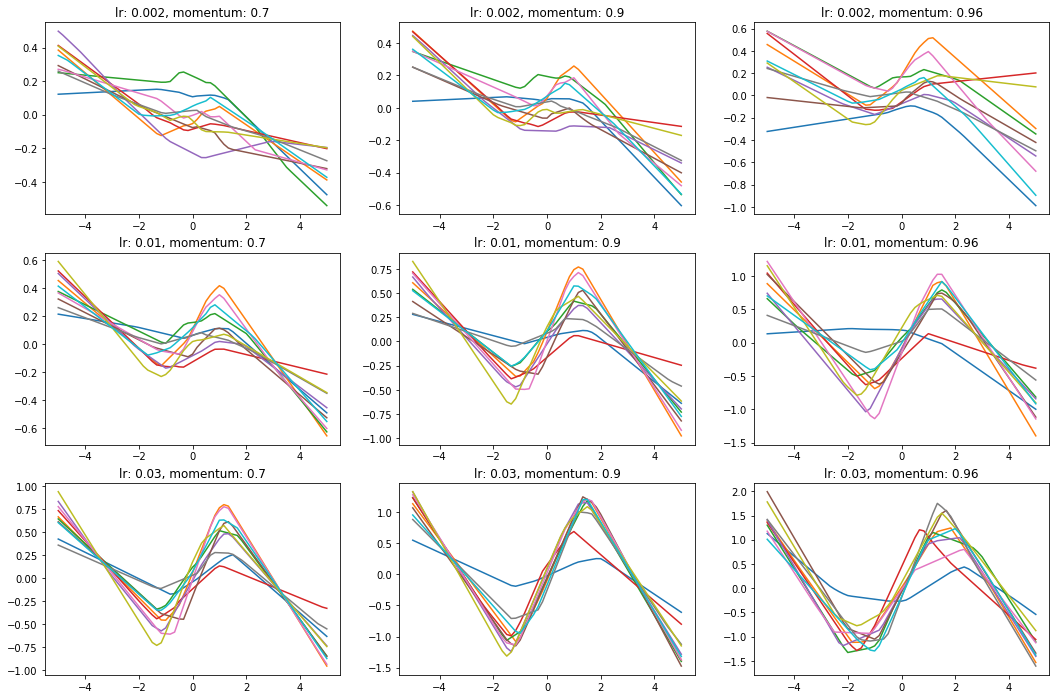

In [271]:
fig, axs = plt.subplots(len(param_frame[facet_x].unique()), len(param_frame[facet_y].unique()), figsize = (18,12))
for xpos in range(len(param_frame[facet_x].unique())):
    for ypos in range(len(param_frame[facet_x].unique())):
        xval = param_frame[facet_x].unique()[xpos]
        yval = param_frame[facet_y].unique()[ypos]
        data = frame[frame[facet_x] == xval]
        data = data[data[facet_y] == yval]
        for bee in range(len(data['bee'].unique())):
            bd = data[data['bee'] == bee].copy()
            axs[xpos,ypos].plot(bd['x'], bd['ypred'])
            axs[xpos,ypos].set_title(facet_x + ': ' + xval + ', '+ facet_y + ': ' + yval)

        
        